In [374]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [325]:
data = pd.read_excel('heartattack_data/Data.xlsx')
descriptions = pd.read_excel('heartattack_data/Variable_Description.xlsx')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [327]:
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [328]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.324503,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.588366,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [329]:
data.isnull().values.any()

False

In [330]:
descriptions

,variable,description
0,age,age in years
1,sex,(1 = male; 0 = female)
2,cp,chest pain type (0 = Non anginal; 1 = Non typ...
3,trestbps,resting blood pressure (in mm Hg on admission...
4,chol,serum cholestoral in mg/dl
5,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; ...
6,restecg,resting electrocardiographic results
7,thalach,maximum heart rate achieved
8,exang,exercise induced angina (1 = yes; 0 = no)
9,oldpeak,ST depression induced by exercise relative to...


In [331]:
data.rename(columns = 
{
    "cp": "chest_pain_type",
    "trestbps": "resting_blood_pressure",
    "chol": "cholesterol",
    "fbs": "fasting_blood_sugar",
    "restecg": "resting_ecg",
    "thalach": "max_heart_rate",
    "exang": "exercise_induced_angina",
    "oldpeak": "st_depression",
    "slope": "st_slope",
    "ca": "num_major_vessels",
    "thal": "thalessimia"
}, inplace = True)

In [332]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalessimia', 'target'],
      dtype='object')

In [333]:
cat_vars = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'exercise_induced_angina', 
            'num_major_vessels', 'thalessimia', 'target']

In [334]:
data.loc[data.sex == 0 , 'sex'] = 'female'
data.loc[data.sex == 1, 'sex'] = 'male'

data.loc[data.chest_pain_type == 0,'chest_pain_type'] = 'non-anginal'
data.loc[data.chest_pain_type == 1,'chest_pain_type'] = 'atypical angina'
data.loc[data.chest_pain_type == 2,'chest_pain_type'] = 'asymptomatic'
data.loc[data.chest_pain_type == 3,'chest_pain_type'] = 'typical'

data.loc[data.fasting_blood_sugar == 0,'fasting_blood_sugar'] = '< 120mg/ml'
data.loc[data.fasting_blood_sugar == 1,'fasting_blood_sugar'] = '> 120mg/ml'

data.loc[data.resting_ecg == 0, 'resting_ecg']  = 'normal'
data.loc[data.resting_ecg == 1 , 'resting_ecg'] = 'abnormal'
data.loc[data.resting_ecg == 2 , 'resting_ecg'] = 'hyper'

data.loc[data.exercise_induced_angina == 0, 'exercise_induced_angina'] = 'no'
data.loc[data.exercise_induced_angina == 1, 'exercise_induced_angina'] = 'yes'

data.loc[data.st_slope == 0, 'st_slope'] = 'upsloping'
data.loc[data.st_slope == 1, 'st_slope'] = 'flat'
data.loc[data.st_slope == 2, 'st_slope'] = 'downsloping'

data.loc[data.thalessimia == 1,'thalessimia'] = 'fixed defect'
data.loc[data.thalessimia == 2,'thalessimia'] = 'normal'
data.loc[data.thalessimia == 3,'thalessimia'] = 'reversable'

data.loc[data.target == 1, 'target'] = 'CVD -'
data.loc[data.target == 0,'target'] = 'CVD +'

In [335]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalessimia,target
0,63,male,typical,145,233,> 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,CVD -
1,37,male,asymptomatic,130,250,< 120mg/ml,abnormal,187,no,3.5,upsloping,0,normal,CVD -
2,41,female,atypical angina,130,204,< 120mg/ml,normal,172,no,1.4,downsloping,0,normal,CVD -
3,56,male,atypical angina,120,236,< 120mg/ml,abnormal,178,no,0.8,downsloping,0,normal,CVD -
4,57,female,non-anginal,120,354,< 120mg/ml,abnormal,163,yes,0.6,downsloping,0,normal,CVD -


<AxesSubplot:>

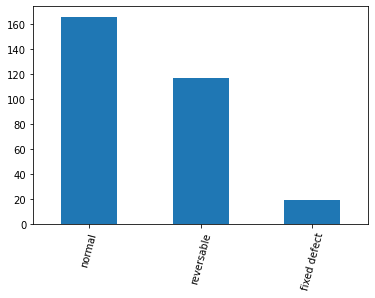

In [336]:
data.thalessimia.value_counts().plot(kind = 'bar', rot=75)

<AxesSubplot:>

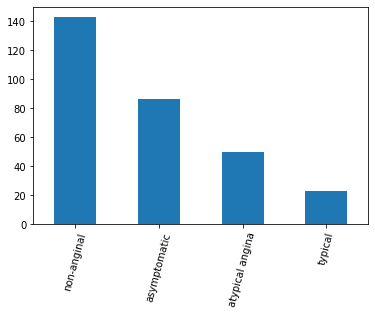

In [337]:
data.chest_pain_type.value_counts().plot(kind = 'bar', rot = 75)

<AxesSubplot:>

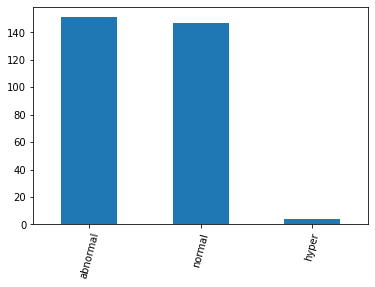

In [338]:
data.resting_ecg.value_counts().plot(kind = 'bar', rot = 75)

Text(0, 0.5, 'Count')

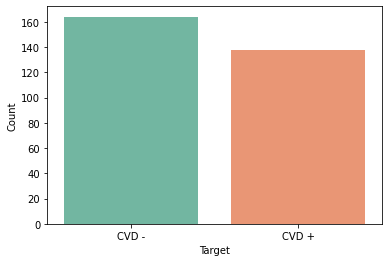

In [340]:
fig, ax = plt.subplots()
sns.countplot(data=data, x='target', palette = 'Set2')
plt.xlabel('Target')
plt.ylabel('Count')

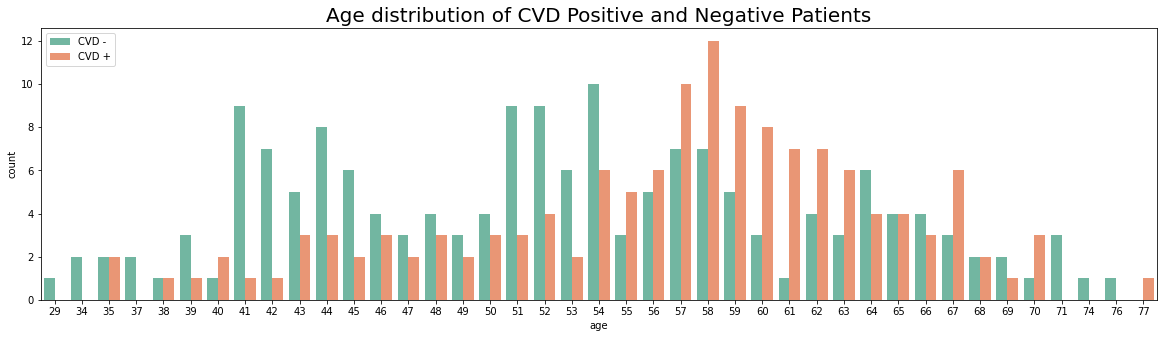

In [341]:
plt.figure(figsize=(20, 5))
sns.countplot(data=data, x='age', hue='target', palette='Set2')
plt.legend(loc='upper left')
plt.title('Age distribution of CVD Positive and Negative Patients', fontsize=20)
plt.show()

<Figure size 1440x360 with 0 Axes>

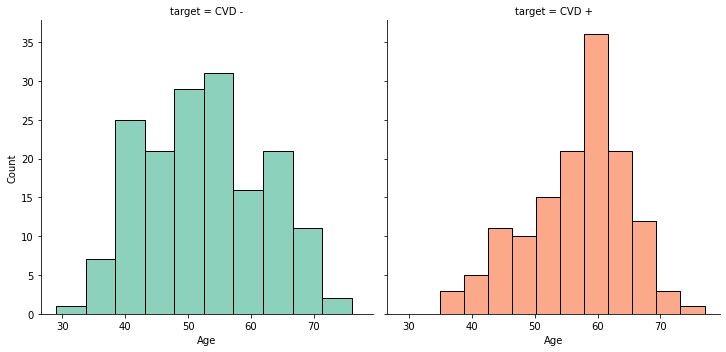

In [342]:
plt.figure(figsize=(20, 5))
g = sns.FacetGrid(data, col="target", hue="target", palette = 'Set2', height = 5, aspect = 1)
g.map(sns.histplot, "age")
g.set_axis_labels(x_var="Age", y_var="Count")
plt.show()

Text(0.5, 1.0, 'Age Distribution of CVD Positive and Negative Patients')

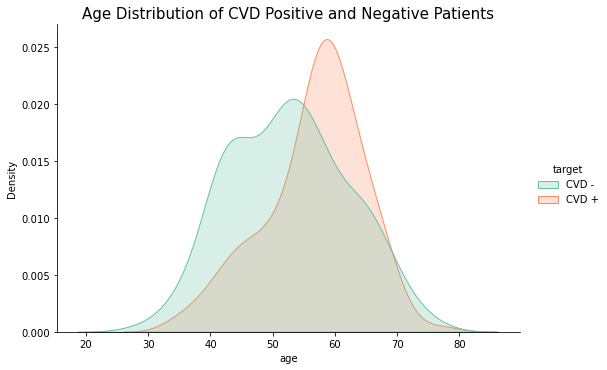

In [343]:
g = sns.displot(data, x='age', hue='target', kind='kde', fill=True, 
                palette='Set2', height=5, aspect=1.5)
plt.title("Age Distribution of CVD Positive and Negative Patients", fontsize=15)

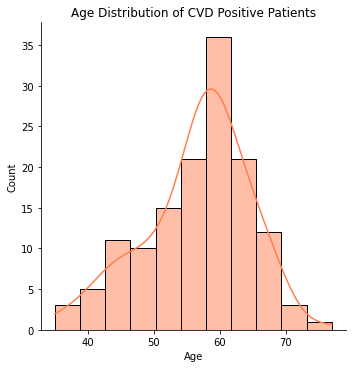

In [344]:
sns.displot(x=data[data.target=='CVD +'].age, kde=True, color = 'coral').set(
    title='Age Distribution of CVD Positive Patients', xlabel='Age')

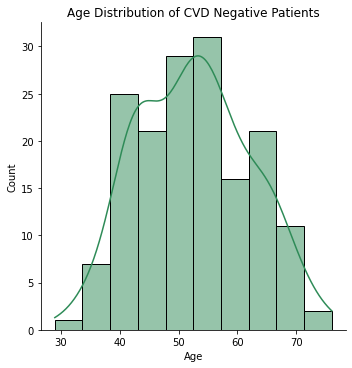

In [345]:
sns.displot(x=data[data.target=='CVD -'].age, kde=True, color = 'seagreen').set(
    title='Age Distribution of CVD Negative Patients', xlabel='Age')

Text(0.5, 1.0, 'Composition of CVD Patients Across Sex')

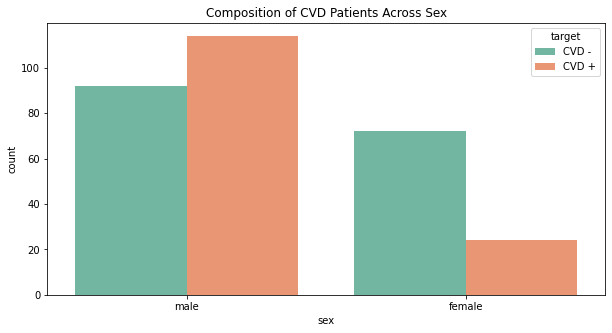

In [346]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='sex', hue='target', palette = 'Set2')
plt.title('Composition of CVD Patients Across Sex')

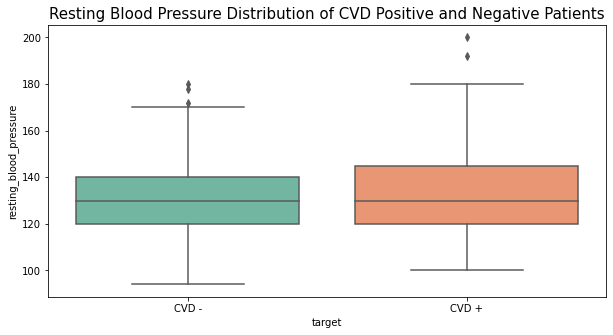

In [347]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=data, x='target', y = 'resting_blood_pressure', palette='Set2')
plt.title('Resting Blood Pressure Distribution of CVD Positive and Negative Patients', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Resting Blood Pressure Distribution of CVD Positive and Negative Patients')

<Figure size 720x360 with 0 Axes>

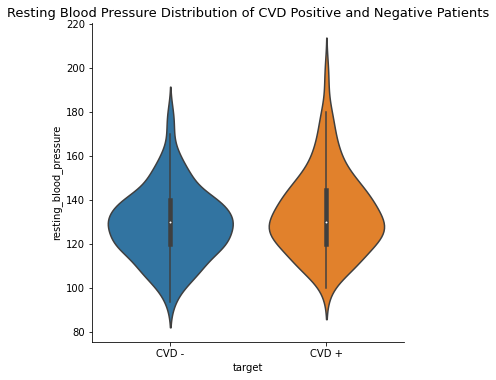

In [348]:
plt.figure(figsize=(10, 5))
ax = sns.catplot(data=data, x="target", y="resting_blood_pressure", kind="violin")
plt.title('Resting Blood Pressure Distribution of CVD Positive and Negative Patients', fontsize=13)

Text(0.5, 1.0, 'Resting BP Distribution of CVD Positive and Negative Patients')

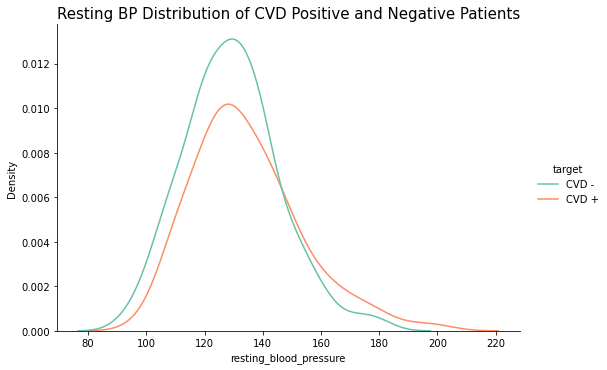

In [351]:
g = sns.displot(data, x='resting_blood_pressure', hue='target', kind='kde', 
                palette='Set2', height=5, aspect=1.5, legend=True)
plt.title("Resting BP Distribution of CVD Positive and Negative Patients", fontsize=15)

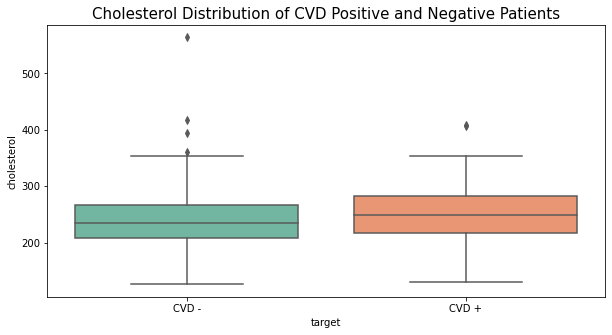

In [352]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=data, x='target', y = 'cholesterol', palette='Set2')
plt.title('Cholesterol Distribution of CVD Positive and Negative Patients', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Cholesterol Distribution of CVD Positive and Negative Patients')

<Figure size 720x360 with 0 Axes>

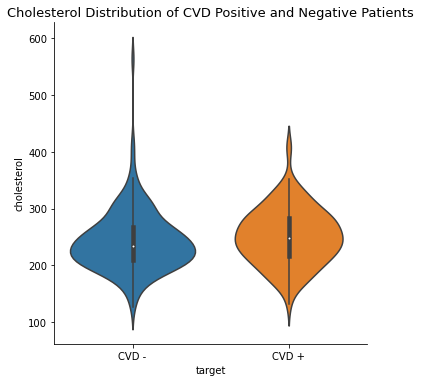

In [353]:
plt.figure(figsize=(10, 5))
ax = sns.catplot(data=data, x="target", y="cholesterol", kind="violin")
plt.title('Cholesterol Distribution of CVD Positive and Negative Patients', fontsize=13)

Text(0.5, 1.0, 'Cholesterol Distribution of CVD Positive and Negative Patients')

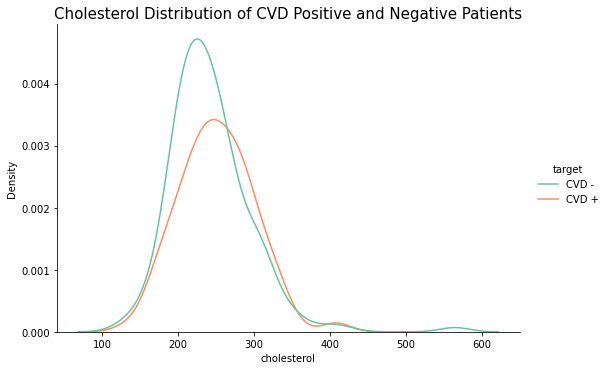

In [354]:
g = sns.displot(data, x='cholesterol', hue='target', kind='kde', 
                palette='Set2', height=5, aspect=1.5)
plt.title("Cholesterol Distribution of CVD Positive and Negative Patients", fontsize=15)

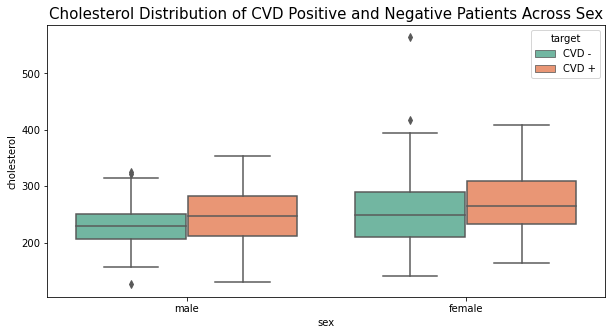

In [356]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=data, x='sex', y = 'cholesterol', hue = 'target', palette='Set2')
plt.title('Cholesterol Distribution of CVD Positive and Negative Patients Across Sex', fontsize=15)
plt.show()

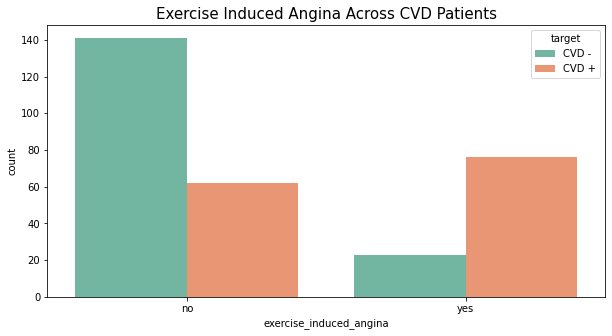

In [359]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='exercise_induced_angina', hue = 'target', palette='Set2')
plt.title('Exercise Induced Angina Across CVD Patients', fontsize=15)
plt.show()

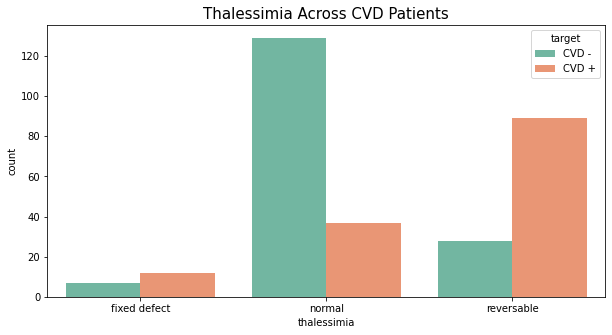

In [361]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='thalessimia', hue = 'target', palette='Set2')
plt.title('Thalessimia Across CVD Patients', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Max Heart Rate Distribution of CVD Positive and Negative Patients')

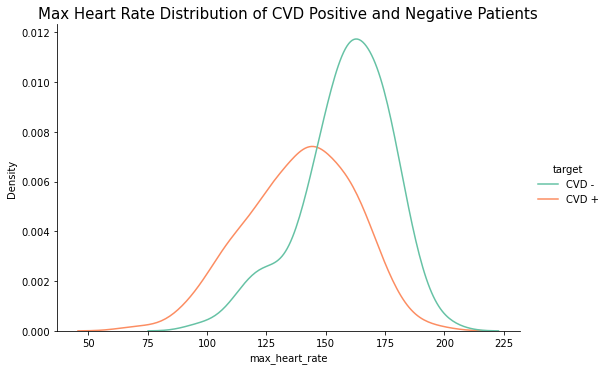

In [364]:
g = sns.displot(data, x='max_heart_rate', hue='target', kind='kde', 
                palette='Set2', height=5, aspect=1.5, legend=True)
plt.title("Max Heart Rate Distribution of CVD Positive and Negative Patients", fontsize=15)

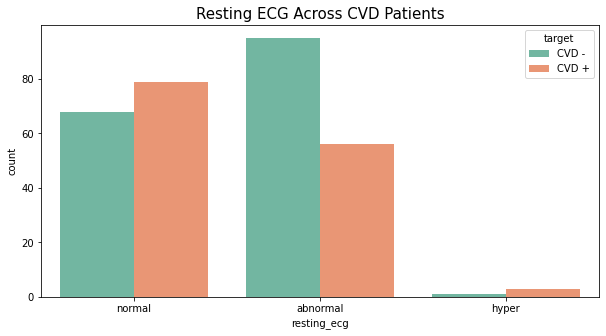

In [369]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='resting_ecg', hue = 'target', palette='Set2')
plt.title('Resting ECG Across CVD Patients', fontsize=15)
plt.show()

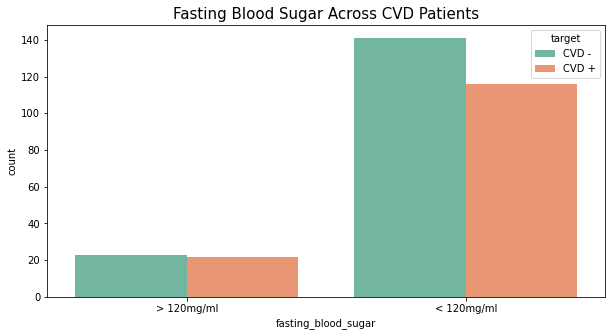

In [368]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=data, x='fasting_blood_sugar', hue = 'target', palette='Set2')
plt.title('Fasting Blood Sugar Across CVD Patients', fontsize=15)
plt.show()

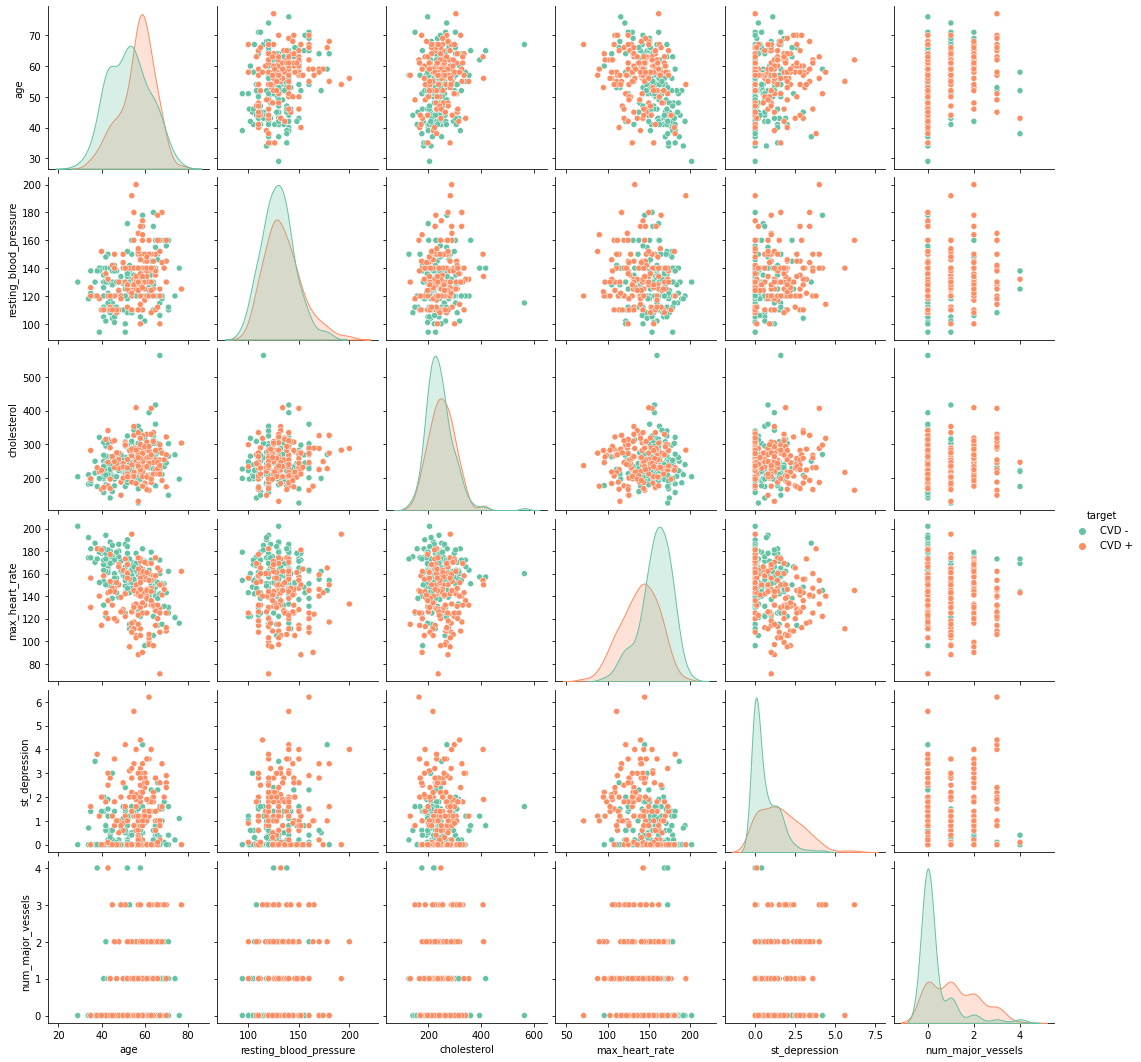

In [370]:
sns.pairplot(data, hue = 'target', palette='Set2')

In [372]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalessimia', 'target'],
      dtype='object')

In [376]:
data.loc[data.sex == 'female' , 'sex'] = 0
data.loc[data.sex == 'male', 'sex'] = 1

data.loc[data.chest_pain_type == 'non-anginal','chest_pain_type'] = 0
data.loc[data.chest_pain_type == 'atypical angina','chest_pain_type'] = 1
data.loc[data.chest_pain_type == 'asymptomatic','chest_pain_type'] = 2
data.loc[data.chest_pain_type == 'typical','chest_pain_type'] = 3

data.loc[data.fasting_blood_sugar == '< 120mg/ml','fasting_blood_sugar'] = 0
data.loc[data.fasting_blood_sugar == '> 120mg/ml','fasting_blood_sugar'] = 1

data.loc[data.resting_ecg == 'normal', 'resting_ecg']  = 0
data.loc[data.resting_ecg == 'abnormal', 'resting_ecg'] = 1
data.loc[data.resting_ecg == 'hyper', 'resting_ecg'] = 2

data.loc[data.exercise_induced_angina == 'no', 'exercise_induced_angina'] = 0
data.loc[data.exercise_induced_angina == 'yes', 'exercise_induced_angina'] = 1

data.loc[data.st_slope == 'upsloping', 'st_slope'] = 0
data.loc[data.st_slope == 'flat', 'st_slope'] = 1
data.loc[data.st_slope == 'downsloping', 'st_slope'] = 2

data.loc[data.thalessimia == 'fixed defect','thalessimia'] = 0
data.loc[data.thalessimia == 'normal','thalessimia'] = 1
data.loc[data.thalessimia == 'reversable','thalessimia'] = 2

data.loc[data.target == 'CVD -', 'target'] = 1
data.loc[data.target == 'CVD +','target'] = 0

In [404]:
X = data.drop('target', axis=1)
y = data['target'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

prediction = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

print(classification_report(y_test, prediction))

Accuracy: 0.8241758241758241
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

